## This is only an example

In [1]:
import numpy as np
import pandas as pd

Read the Excel file

In [2]:
data = pd.read_excel("prison_category.xlsx")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,Region,Sub Region,Country,Category,Year,Count
0,Africa,Eastern Africa,Burundi,1.Adults,2006,7858
1,Africa,Eastern Africa,Burundi,1.Adults,2007,7882
2,Africa,Eastern Africa,Burundi,1.Adults,2008,9451
3,Africa,Eastern Africa,Burundi,1.Adults,2009,10460
4,Africa,Eastern Africa,Burundi,1.Adults,2010,9477


Split the column Category into "Cat_No" and "Cat_Name" based on the delimiter "."

In [15]:
data[["Cat_No","Cat_Name"]]=data.Category.str.split('.',-1,True)

In [16]:
data.head()

,Region,Sub Region,Country,Category,Year,Count,Cat_No,Cat_Name
0,Africa,Eastern Africa,Burundi,1.Adults,2006,7858,1,Adults
1,Africa,Eastern Africa,Burundi,1.Adults,2007,7882,1,Adults
2,Africa,Eastern Africa,Burundi,1.Adults,2008,9451,1,Adults
3,Africa,Eastern Africa,Burundi,1.Adults,2009,10460,1,Adults
4,Africa,Eastern Africa,Burundi,1.Adults,2010,9477,1,Adults


Group the data based on Year and calculate the basic stats

In [17]:
Year_wise=data.groupby("Year")["Count"].describe()

In [18]:
Year_wise

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2003,161.0,25836.285714,164833.398941,0.0,131.00,1143.0,9931.00,2071969.0
2004,224.0,29838.008929,159384.035868,0.0,156.50,1435.0,11365.00,2139600.0
2005,282.0,27286.468085,147021.078116,0.0,206.25,1748.0,10479.25,2179600.0
2006,297.0,35336.269360,193432.461753,1.0,182.00,1609.0,10406.00,2242000.0
2007,300.0,35562.383333,195398.617307,0.0,196.75,2148.5,10096.00,2271100.0
2008,341.0,34918.809384,185842.428655,0.0,231.00,1930.0,10536.00,2289500.0
2009,345.0,33991.773913,183412.828726,0.0,192.00,1861.0,10218.00,2281900.0
2010,358.0,42818.379888,215284.373263,0.0,218.50,2103.5,11446.00,2269200.0
2011,361.0,42220.565097,211920.046778,0.0,209.00,1982.0,11892.00,2244800.0


HIstogram of the year wise data

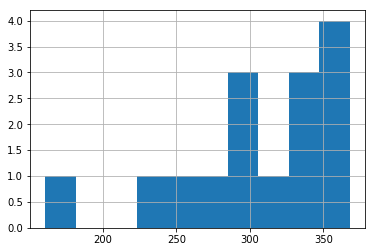

In [20]:
Year_wise["count"].hist()

Finding the number prisoners in each region every year

In [21]:
data.groupby(["Year","Region"])["Count"].sum()

Year  Region  
2003  Africa        63526
      Americas    2487504
      Asia         541794
      Europe      1048080
      Oceania       18738
2004  Africa        91321
      Americas    2601067
      Asia        1370569
      Europe      2596981
      Oceania       23776
2005  Africa       180090
      Americas    3006185
      Asia        1719077
      Europe      2774572
      Oceania       14860
2006  Africa       193818
      Americas    5631520
      Asia        1764967
      Europe      2889391
      Oceania       15176
2007  Africa       336625
      Americas    5754086
      Asia        1504360
      Europe      3003377
      Oceania       70267
2008  Africa       568141
      Americas    6479287
      Asia        1648902
      Europe      3139256
      Oceania       71728
                   ...   
2012  Africa       396578
      Americas    6864695
      Asia        5314928
      Europe      2602540
      Oceania       75599
2013  Africa       574502
      Americas    68855

Finding the number of Adult prisoners in the United States every year after 2009

In [26]:
data[(data["Country"].str.contains("United States of America")) & (data["Cat_Name"].str.contains('Adults')) & (data["Year"] > 2009)]

,Region,Sub Region,Country,Category,Year,Count,Cat_No,Cat_Name
941,Americas,Northern America,United States of America,1.Adults,2010,2269200,1,Adults
942,Americas,Northern America,United States of America,1.Adults,2011,2244800,1,Adults
943,Americas,Northern America,United States of America,1.Adults,2012,2224700,1,Adults
944,Americas,Northern America,United States of America,1.Adults,2013,2216500,1,Adults
945,Americas,Northern America,United States of America,1.Adults,2014,2219800,1,Adults
946,Americas,Northern America,United States of America,1.Adults,2015,2168100,1,Adults
947,Americas,Northern America,United States of America,1.Adults,2016,2157500,1,Adults


Sorted order of average number of prisoners in each category for the country Mexico

In [34]:
Mex = data[data["Country"].str.contains("Mexico")]
Mex_cat = Mex.groupby("Cat_Name")
Mex_cat_mean = Mex_cat["Count"].mean()
Mex_cat_mean_sort = Mex_cat_mean.sort_values()
print(Mex_cat_mean_sort)

Cat_Name
Foreigners      2148.444444
Juveniles       5133.357143
Adults        199187.533333
Nationals     215658.300000
Name: Count, dtype: float64


Histogram of Juvenile prisoners in Mongolia showing a steady decline over the years

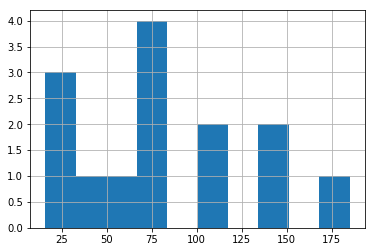

In [36]:
Mong = data[data["Country"].str.contains("Mongolia")]
Mong_Juv = Mong[Mong["Cat_No"].str.contains("2")]
Mong_Juv_Hist = Mong_Juv["Count"].hist()

Create a new coulmn and assign the values of either "Internationals" or "Locals" based on the values in the column "Cat_Name"

In [29]:
data['main_category'] = np.where(data['Cat_Name']=='Foreigners', 'Internationals', 'Locals')

In [31]:
data.head()

,Region,Sub Region,Country,Category,Year,Count,Cat_No,Cat_Name,main_category
0,Africa,Eastern Africa,Burundi,1.Adults,2006,7858,1,Adults,Locals
1,Africa,Eastern Africa,Burundi,1.Adults,2007,7882,1,Adults,Locals
2,Africa,Eastern Africa,Burundi,1.Adults,2008,9451,1,Adults,Locals
3,Africa,Eastern Africa,Burundi,1.Adults,2009,10460,1,Adults,Locals
4,Africa,Eastern Africa,Burundi,1.Adults,2010,9477,1,Adults,Locals


Finding all the Countries in sorted order(ascending) that had less than 500 local prisoners in the year 2010

In [38]:
Loc_2010=data[(data["main_category"].str.contains("Locals")) &(data["Year"]==2010)]
Loc_2010_country=Loc_2010.groupby("Country")
Loc_2010_country_sort=Loc_2010_country["Count"].sum().sort_values()
Loc_2010_country_sort_500=Loc_2010_country_sort[Q6_3<500]
print(Loc_2010_country_sort_500)

Country
Holy See            0
Faeroe Islands      8
Monaco             13
Andorra            53
Liechtenstein      91
Iceland           307
Name: Count, dtype: int64
